In [4]:
!pip install awkward-pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import uproot


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [5]:
energy_bins = np.append(np.linspace(0, 2, 21), 1e9) # matches Dark Neutrino e+e-, https://microboone-docdb.fnal.gov/cgi-bin/sso/ShowDocument?docid=41219
cos_bins = np.concatenate([np.linspace(-1, 0, 3), np.linspace(0, 0.8, 7), np.linspace(0.8, 0.9, 10), np.linspace(0.9, 1, 10)])
z_bins = np.linspace(0, 1036.8, 11)


In [6]:
f = uproot.open("/nevis/riverside/data/leehagaman/ngem/data_files/checkout_isotropic_one_gamma_run45_reco2_prod_reco2_hist_4a.root")
iso_truth_df = f["wcpselection"]["T_PFeval"].arrays([
    "truth_pdg",
    "truth_mother",
    "truth_startMomentum",
    "truth_startXYZT",
    ],library="pd")

iso_truth_df

,truth_pdg,truth_mother,truth_startMomentum,truth_startXYZT
0,"[22, 11, -11, 22, 22, 22, 22, 22, 22, 22, 22, ...","[0, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 58, 55...","[[0.21837159991264343, 0.1601889282464981, 0.3...","[[-50.77387619018555, -64.97299194335938, 597...."
1,"[22, 11, -11, 22, -11, 22, 22, 22, 22, 22, 22,...","[0, 1, 1, 2, 7, 3, 3, 3, 3, 3, 3, 128, 128, 12...","[[0.09565728902816772, 0.2457118034362793, 0.1...","[[111.63787841796875, 0.6541633009910583, 389...."
2,"[22, 11, -11, 22, 11, 22, 11]","[0, 1, 1, 2, 8, 3, 53]","[[-0.013667994178831577, -0.06295690685510635,...","[[5.902533054351807, 90.61141204833984, 532.98..."
3,"[22, 11, -11, 22, 22, -11]","[0, 1, 1, 2, 2, 14]","[[0.10345099121332169, 0.0362834706902504, 0.0...","[[180.24595642089844, -97.72506713867188, 386...."
4,"[22, 11, -11, 22, 22, 22, 11, 11, 22, 22, 22, ...","[0, 1, 1, 2, 2, 2, 47, 40, 3, 3, 3, 3, 3, 443,...","[[0.2175879180431366, -0.07540831714868546, 0....","[[120.7902603149414, 135.7707061767578, 369.28..."
...,...,...,...,...
54617,"[22, 11, -11, 22, 11, 11, -11, 22, 11, 11]","[0, 1, 1, 2, 2, 9, 9, 83, 95, 3]","[[0.026383113116025925, 0.057451292872428894, ...","[[252.2527618408203, 37.74281692504883, 478.52..."
54618,"[22, 11, -11, 22, 22, 11, 22, 11, 11]","[0, 1, 1, 2, 2, 2, 2, 35, 23]","[[-0.1345142275094986, 0.09246071428060532, 0....","[[153.25665283203125, -39.679264068603516, 886..."
54619,"[22, 11, -11, 22, 22, 22, 22, 22, 22, 22, 22, ...","[0, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 65, 56, 56, ...","[[0.007741373963654041, -0.11310500651597977, ...","[[119.12873077392578, -27.891401290893555, 129..."
54620,"[22, 11, -11, 22, 22, 22, 22, 22, 22, 11, 11, ...","[0, 1, 1, 2, 2, 2, 2, 2, 2, 58, 40, 29, 203, 2...","[[0.22131429612636566, 0.33674052357673645, 0....","[[116.34584045410156, -0.6678046584129333, 624..."


In [7]:
truth_pdgs = iso_truth_df["truth_pdg"].to_numpy()
truth_mothers = iso_truth_df["truth_mother"].to_numpy()
truth_start_momentums = iso_truth_df["truth_startMomentum"].to_numpy()
truth_start_xyzts = iso_truth_df["truth_startXYZT"].to_numpy()


In [8]:
energies = []
costhetas = []
zs = []
for event_i in tqdm(range(len(iso_truth_df))):
    energy = np.nan
    costheta = np.nan
    for j in range(len(truth_pdgs[event_i])):
        if truth_mothers[event_i][j] == 0 and truth_pdgs[event_i][j] == 22:
            four_momentum = truth_start_momentums[event_i][j]
            three_momentum = four_momentum[:3]
            xy_momentum = np.linalg.norm(three_momentum[:2])
            z_momentum = three_momentum[2]
            energy = four_momentum[3]
            costheta = z_momentum / np.linalg.norm(three_momentum)
            z = truth_start_xyzts[event_i][j][2]
    energies.append(energy)
    costhetas.append(costheta)
    zs.append(z)

iso_truth_df["prim_photon_energy"] = energies
iso_truth_df["prim_photon_costheta"] = costhetas
iso_truth_df["prim_photon_z"] = zs

benchmark_1_energies = iso_truth_df["prim_photon_energy"].to_numpy()
benchmark_1_cosines = iso_truth_df["prim_photon_costheta"].to_numpy()
benchmark_1_zs = iso_truth_df["prim_photon_z"].to_numpy()
benchmark_1_weights = [0.001] * len(benchmark_1_energies)


100%|██████████| 54622/54622 [00:00<00:00, 58277.06it/s]


In [15]:
"""benchmark_1_energies = []
benchmark_1_cosines = []
benchmark_1_zs = []
benchmark_1_weights = []
with open("/nevis/riverside/data/karan/TMM_Karan/hepevt_filtered_mass_0.48_tmm_2.5e-06.txt", "r") as f:
    lines = f.readlines()
    for line in tqdm(lines):
        if len(line.split()) == 15:
            final_state_type, pdg, mother_1, mother_2, daughter_1, daughter_2, momentum_x, momentum_y, momentum_z, energy, mass, position_x, position_y, position_z, time = line.split()
            final_state_type = int(final_state_type)
            pdg = int(pdg)
            mother_1 = int(mother_1)
            mother_2 = int(mother_2)
            daughter_1 = int(daughter_1)
            daughter_2 = int(daughter_2)
            momentum_x = float(momentum_x)
            momentum_y = float(momentum_y)
            momentum_z = float(momentum_z)
            energy = float(energy)
            mass = float(mass)
            position_x = float(position_x)
            position_y = float(position_y)
            position_z = float(position_z)
            if pdg == 22:
                benchmark_1_energies.append(energy)
                benchmark_1_cosines.append(momentum_z / np.sqrt(momentum_x**2 + momentum_y**2 + momentum_z**2))
                benchmark_1_zs.append(position_z)
            if pdg == 0: # fake particle to save weights
                benchmark_1_weights.append(energy)"""

benchmark_2_energies = []
benchmark_2_cosines = []
benchmark_2_zs = []
benchmark_2_weights = []
with open("/nevis/riverside/data/karan/TMM_Karan/hepevt_filtered_mass_0.48_tmm_2.5e-06.txt", "r") as f:
    lines = f.readlines()
    for line in tqdm(lines):
        if len(line.split()) == 15:
            final_state_type, pdg, mother_1, mother_2, daughter_1, daughter_2, momentum_x, momentum_y, momentum_z, energy, mass, position_x, position_y, position_z, time = line.split()
            final_state_type = int(final_state_type)
            pdg = int(pdg)
            mother_1 = int(mother_1)
            mother_2 = int(mother_2)
            daughter_1 = int(daughter_1)
            daughter_2 = int(daughter_2)
            momentum_x = float(momentum_x)
            momentum_y = float(momentum_y)
            momentum_z = float(momentum_z)
            energy = float(energy)
            mass = float(mass)
            position_x = float(position_x)
            position_y = float(position_y)
            position_z = float(position_z)
            if pdg == 22:
                benchmark_2_energies.append(energy)
                benchmark_2_cosines.append(momentum_z / np.sqrt(momentum_x**2 + momentum_y**2 + momentum_z**2))
                benchmark_2_zs.append(position_z)
            if pdg == 0: # fake particle to save weights
                benchmark_2_weights.append(energy)

benchmark_1_df = pd.DataFrame({"energy": benchmark_1_energies, "cosine": benchmark_1_cosines, "z": benchmark_1_zs})
benchmark_2_df = pd.DataFrame({"energy": benchmark_2_energies, "cosine": benchmark_2_cosines, "z": benchmark_2_zs})


100%|██████████| 568164/568164 [00:02<00:00, 190702.34it/s]


In [10]:
benchmark_1_df

,energy,cosine,z
0,0.409920,0.750667,597.000061
1,0.297738,0.464457,389.635864
2,0.116182,0.832180,532.982422
3,0.128360,0.520141,386.604156
4,0.899408,0.966666,369.286499
...,...,...,...
54617,0.203480,0.950511,478.529877
54618,0.254492,0.767221,886.839783
54619,0.515645,0.975531,129.559631
54620,0.677284,0.803755,624.724854


In [11]:
benchmark_2_df

,energy,cosine,z
0,0.111737,0.847025,663.794096
1,0.274415,0.979167,446.926999
2,0.123286,0.671259,778.921721
3,0.054792,0.629653,796.437644
4,0.035101,0.732640,262.560015
...,...,...,...
502671,1.388554,0.993688,806.270438
502672,0.482676,0.994807,1005.877552
502673,0.148946,0.993023,351.465025
502674,0.183999,0.968002,647.715144


In [16]:
benchmark_1_energy_bin_indices = np.digitize(benchmark_1_energies, energy_bins) - 1
benchmark_1_cosine_bin_indices = np.digitize(benchmark_1_cosines, cos_bins) - 1
benchmark_1_z_bin_indices = np.digitize(benchmark_1_zs, z_bins) - 1

print(np.min(benchmark_1_energy_bin_indices), np.max(benchmark_1_energy_bin_indices))
print(np.min(benchmark_1_cosine_bin_indices), np.max(benchmark_1_cosine_bin_indices))
print(np.min(benchmark_1_z_bin_indices), np.max(benchmark_1_z_bin_indices))

num_energy_bins = len(energy_bins) - 1
num_cos_bins = len(cos_bins) - 1
num_z_bins = len(z_bins) - 1

# Clamp out-of-range indices to valid ranges
benchmark_1_energy_bin_indices = np.clip(benchmark_1_energy_bin_indices, 0, num_energy_bins - 1)
benchmark_1_cosine_bin_indices = np.clip(benchmark_1_cosine_bin_indices, 0, num_cos_bins - 1)
benchmark_1_z_bin_indices = np.clip(benchmark_1_z_bin_indices, 0, num_z_bins - 1)

# Build flattened indices after clamping
benchmark_1_flattened_3d_bin_indices = (
    benchmark_1_energy_bin_indices * (num_cos_bins) * (num_z_bins)
    + benchmark_1_cosine_bin_indices * (num_z_bins)
    + benchmark_1_z_bin_indices
).astype(np.int64)

benchmark_1_counts = np.histogramdd(
    (benchmark_1_energies, benchmark_1_cosines, benchmark_1_zs),
    bins=(energy_bins, cos_bins, z_bins),
    weights=benchmark_1_weights
)[0]
benchmark_2_counts = np.histogramdd(
    (benchmark_2_energies, benchmark_2_cosines, benchmark_2_zs),
    bins=(energy_bins, cos_bins, z_bins),
    weights=benchmark_2_weights
)[0]

# Safe division: avoid divide-by-zero warnings and fill 0 where denom is 0
reweighting_ratios = np.divide(
    benchmark_2_counts,
    benchmark_1_counts,
    out=np.zeros_like(benchmark_2_counts, dtype=float),
    where=benchmark_1_counts > 0
)

# Flatten in C-order to match manual indexing scheme
reweighting_ratios_flattened = reweighting_ratios.ravel()

# Ensure weights are numpy array for later elementwise multiplication
benchmark_1_weights = np.asarray(benchmark_1_weights, dtype=float)

# Map each event to its ratio
benchmark_1_to_2_reweighting_ratios = reweighting_ratios_flattened[benchmark_1_flattened_3d_bin_indices]


0 20
0 28
-1 10


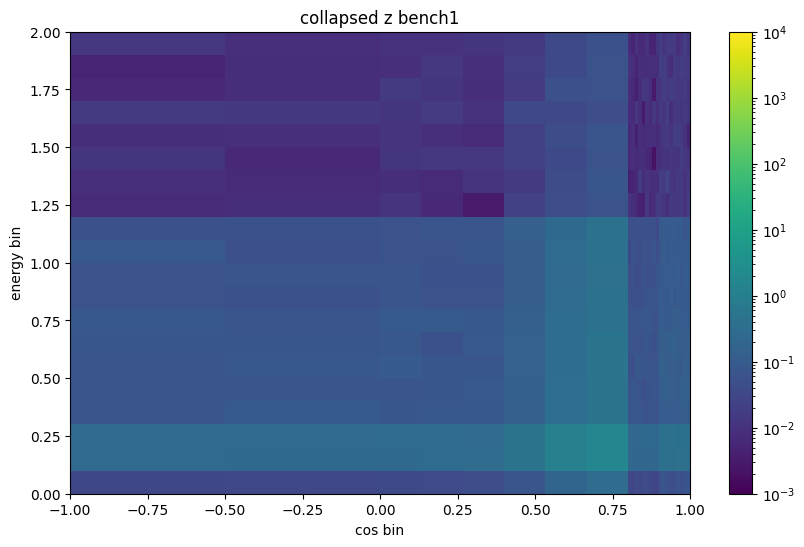

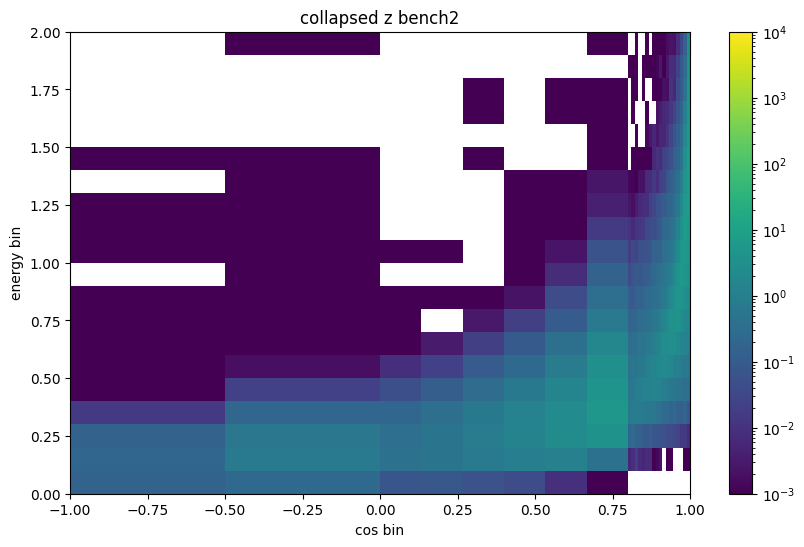

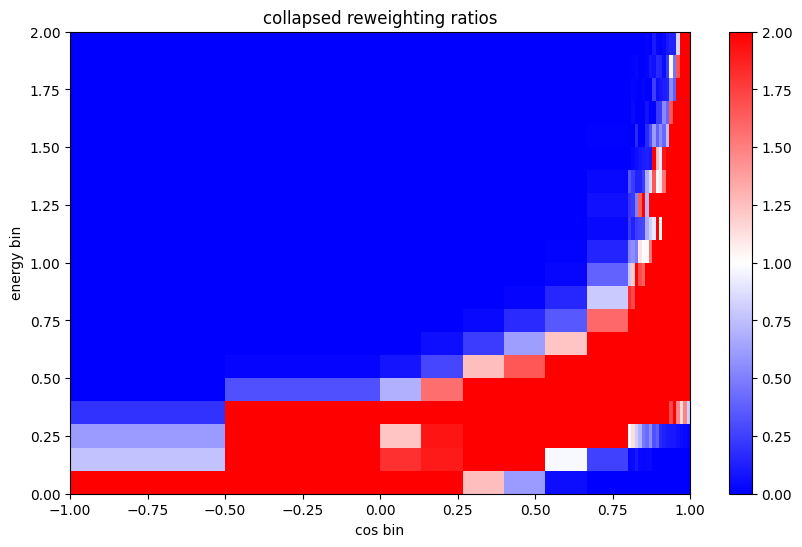

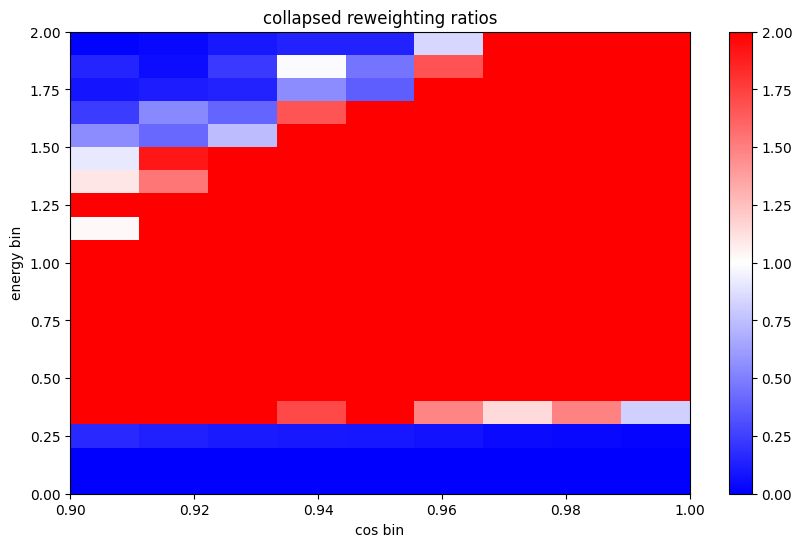

In [17]:
collapsed_z_bench1 = np.sum(benchmark_1_counts, axis=2)
collapsed_z_bench2 = np.sum(benchmark_2_counts, axis=2)

# Safe division for collapsed ratios
collapsed_z_reweighting_ratios = np.divide(
    collapsed_z_bench2,
    collapsed_z_bench1,
    out=np.zeros_like(collapsed_z_bench2, dtype=float),
    where=collapsed_z_bench1 > 0
)

from matplotlib.colors import LogNorm

plt.figure(figsize=(10, 6))
# log norm with min=1e-3
mesh = plt.pcolormesh(cos_bins, energy_bins, collapsed_z_bench1, shading='auto', norm=LogNorm(vmin=1e-3, vmax=1e4))
plt.colorbar(mesh)
plt.xlabel("cos bin")
plt.ylabel("energy bin")
plt.title("collapsed z bench1")
plt.ylim(0, energy_bins[-2])
plt.show()

plt.figure(figsize=(10, 6))
mesh = plt.pcolormesh(cos_bins, energy_bins, collapsed_z_bench2, shading='auto', norm=LogNorm(vmin=1e-3, vmax=1e4))
plt.colorbar(mesh)
plt.xlabel("cos bin")
plt.ylabel("energy bin")
plt.title("collapsed z bench2")
plt.ylim(0, energy_bins[-2])
plt.show()

plt.figure(figsize=(10, 6))
mesh = plt.pcolormesh(cos_bins, energy_bins, collapsed_z_reweighting_ratios, shading='auto', vmin=0, vmax=2, cmap="bwr")
plt.colorbar(mesh)
plt.xlabel("cos bin")
plt.ylabel("energy bin")
plt.title("collapsed reweighting ratios")
plt.ylim(0, energy_bins[-2])
plt.show()

plt.figure(figsize=(10, 6))
mesh = plt.pcolormesh(cos_bins, energy_bins, collapsed_z_reweighting_ratios, shading='auto', vmin=0, vmax=2, cmap="bwr")
plt.colorbar(mesh)
plt.xlim(0.9, 1)
plt.xlabel("cos bin")
plt.ylabel("energy bin")
plt.title("collapsed reweighting ratios")
plt.ylim(0, energy_bins[-2])
plt.show()

In [2]:
import uproot

file_path = "/nevis/houston/home/fk2476/TMM/Karan/TMM_w_overlay_15000.root"

with uproot.open(file_path) as f:
    tree = f["singlephotonana/vertex_tree;1"]
    
    print("Number of entries:", tree.num_entries)
    print("\nBranches in vertex_tree:\n")
    
    for branch in tree.keys():
        print(branch)


Number of entries: 13545

Branches in vertex_tree:

run_number
subrun_number
event_number
pot_per_event
pot_per_subrun
number_of_events_in_subrun
genie_spline_weight
genie_CV_tune_weight
photonu_weight_low
photonu_weight_high
test_matched_hits
reco_vertex_size
reco_vertex_x
reco_vertex_y
reco_vertex_z
reco_vertex_wire_p0
reco_vertex_wire_p1
reco_vertex_wire_p2
reco_vertex_tick
reco_vertex_in_SCB
reco_vertex_dist_to_SCB
reco_vertex_dist_to_active_TPC
reco_vertex_to_nearest_dead_wire_plane0
reco_vertex_to_nearest_dead_wire_plane1
reco_vertex_to_nearest_dead_wire_plane2
reco_slice_objects
m_flash_optfltr_pe_beam
m_flash_optfltr_pe_veto
m_flash_optfltr_pe_veto_tot
m_flash_optfltr_pe_beam_tot
textgen_info
isolation_min_dist_trk_shr
isolation_min_dist_trk_unassoc
isolation_num_shr_hits_win_1cm_trk
isolation_num_shr_hits_win_2cm_trk
isolation_num_shr_hits_win_5cm_trk
isolation_num_shr_hits_win_10cm_trk
isolation_num_unassoc_hits_win_1cm_trk
isolation_num_unassoc_hits_win_2cm_trk
isolation_num

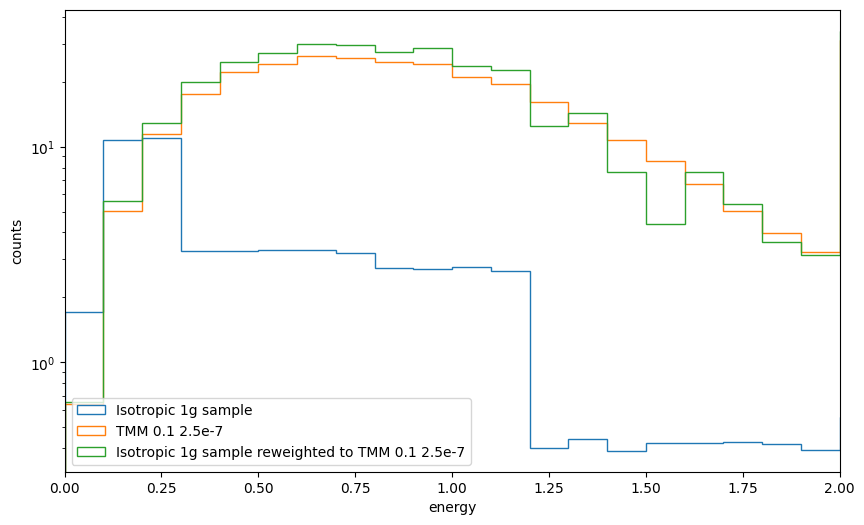

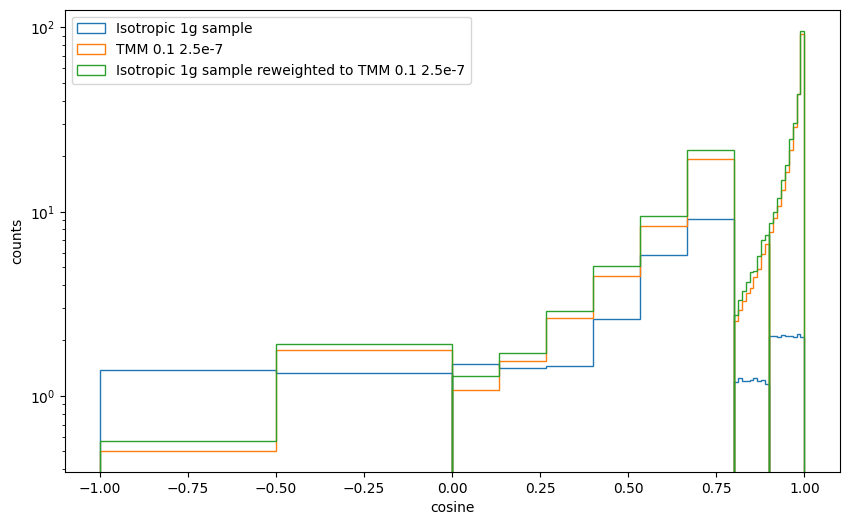

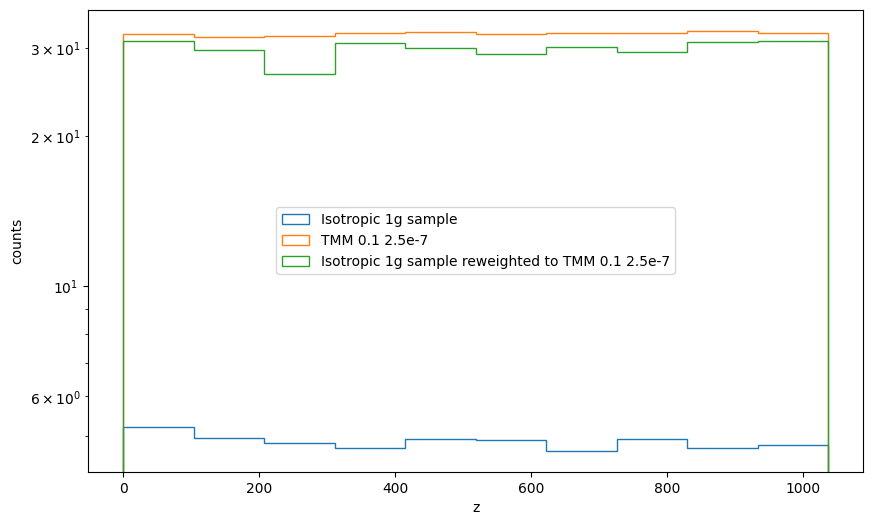

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(benchmark_1_energies, bins=energy_bins, weights=benchmark_1_weights, histtype="step", label="Isotropic 1g sample")
plt.hist(benchmark_2_energies, bins=energy_bins, weights=benchmark_2_weights, histtype="step", label="TMM 0.1 2.5e-7")
plt.hist(benchmark_1_energies, bins=energy_bins, weights=benchmark_1_weights*benchmark_1_to_2_reweighting_ratios, histtype="step", label="Isotropic 1g sample reweighted to TMM 0.1 2.5e-7")
plt.legend()
plt.xlim(0, energy_bins[-2])
plt.yscale("log")
plt.xlabel("energy")
plt.ylabel("counts")
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(benchmark_1_cosines, bins=cos_bins, weights=benchmark_1_weights, histtype="step", label="Isotropic 1g sample")
plt.hist(benchmark_2_cosines, bins=cos_bins, weights=benchmark_2_weights, histtype="step", label="TMM 0.1 2.5e-7")
plt.hist(benchmark_1_cosines, bins=cos_bins, weights=benchmark_1_weights*benchmark_1_to_2_reweighting_ratios, histtype="step", label="Isotropic 1g sample reweighted to TMM 0.1 2.5e-7")
plt.legend()
plt.yscale("log")
plt.xlabel("cosine")
plt.ylabel("counts")
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(benchmark_1_zs, bins=z_bins, weights=benchmark_1_weights, histtype="step", label="Isotropic 1g sample")
plt.hist(benchmark_2_zs, bins=z_bins, weights=benchmark_2_weights, histtype="step", label="TMM 0.1 2.5e-7")
plt.hist(benchmark_1_zs, bins=z_bins, weights=benchmark_1_weights*benchmark_1_to_2_reweighting_ratios, histtype="step", label="Isotropic 1g sample reweighted to TMM 0.1 2.5e-7")
plt.legend()
plt.xlabel("z")
plt.yscale("log")
plt.ylabel("counts")
plt.show()